#### Observer_00.ipynb  3-Mar  AE  
*  use matplotlib with interactive widgets
*  versions
 *  01 - from source  _ref_
 *  02 - using loader_Observer module (local)
 *  03 - expansion
      1. insert MD cells to explain functionality
 *  04 ___

local import


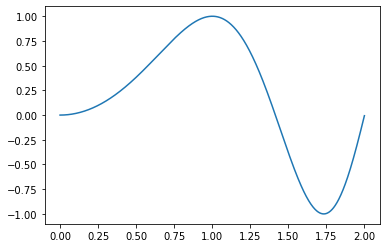

FloatSlider(value=0.5, description='coeff of x*Π*t', max=1.0, min=0.1)

In [4]:
%matplotlib inline
# using AE module for most imports
print("local import")
from loader_Observer \
    import *
from IPython.display \
    import display, clear_output
# set CONSTS from loaded modules
sin  = np.sin
cos  = np.cos
Π    = np.pi
AR   = np.arange
LN   = np.linspace
PLOT = plt
INIT = PLOT.subplots
DISP = display
CLR  = clear_output
SLID = widgets.FloatSlider

# initialize; prevent redraw
fig, ax = INIT()
PLOT.close(fig) 

# set plot variables
origin = 0.0
ar_start = origin
ar_end   = 1.0
ar_incr  = 0.001
ln_start = origin
ln_end   = 2.0
ln_incr  = 1000

# set x and y axes
t = AR(ar_start,
       ar_end,
       ar_incr)
x = LN(ln_start,
       ln_end,
       ln_incr)
# formula (arcsin)
s = x*Π*t # this is what is to be scaled

# create widget
OBSV_f = SLID \
    ( description=('coeff of x*Π*t'),
      min=0.1, max=1, step=0.1, 
      value=0.5 )

freq = 1.0 # initialize frequency
# frequency is arcsin coefficient
def Plot_andDisplay(coeff):
    ax.clear()
    ax.plot(x, sin(s*coeff))
    DISP(fig)
#  CALL plot and display
Plot_andDisplay(freq)

#  observer
def OBSV_f_change(change):
    CLR(wait=True) # trigger:
    Plot_andDisplay(change['new'])
    DISP(OBSV_f)
#  register observer
OBSV_f.observe(OBSV_f_change, names='value')
DISP(OBSV_f)